# Exploratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

### Import the json file to a DataFrame

In [4]:
with open('logins.json') as f:
    json_list = json.load(f)
json_df = pd.DataFrame(json_list)
json_s = pd.to_datetime(json_df.login_time)

In [5]:
json_df = pd.DataFrame(json_s)
json_df['count'] = 1
json_df = json_df.set_index(json_df.login_time).drop('login_time', axis = 1)

In [31]:
json_df.head(5)

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


### Group login counts by 15 mins time slots

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


None

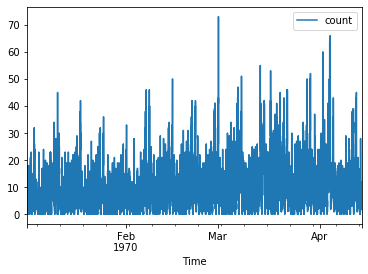

In [7]:
tdf =  json_df.groupby(pd.Grouper(freq='15Min')).sum()
display(display(tdf.head(5)))
tdf['time'] = tdf.index
tdf.plot(y='count')
plt.xlabel('Time')
plt.show()

We really can't investigate the data as is, let's explore the hourly, daily and monthly trends

### <div class="alert alert-success"> Trend over Time per Day </div>

time
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459
Name: count, dtype: int64

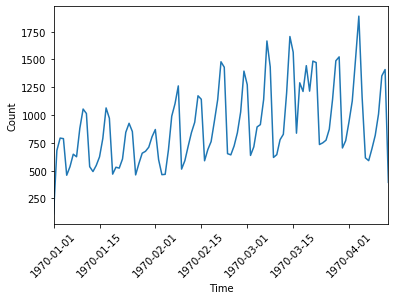

In [10]:
tdf_day = tdf['count'].groupby(by=tdf['time'].dt.date).sum()
display(tdf_day.head(5))
tdf_day.plot(y='count')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

We clearly distinguish a weekly and a seasonal trends. Let's investigate further

### <div class="alert alert-success"> Weekly Trend </div>

time
Monday        8823
Tuesday       9268
Wednesday    10339
Thursday     11960
Friday       15208
Saturday     19377
Sunday       18167
Name: count, dtype: int64

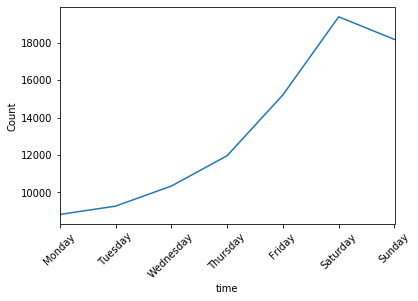

In [12]:
daysoftheweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
tdf_dayoftheweek = tdf['count'].groupby(by=tdf['time'].dt.weekday_name).sum().reindex(daysoftheweek)
display(tdf_dayoftheweek)
tdf_dayoftheweek.plot(y='count')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

As we can see, the number of logins increase as the week goes by.

### <div class="alert alert-success"> Seasonal Trend </div>

In [15]:
tdf

,count,time
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00
...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00
1970-04-13 18:00:00,5,1970-04-13 18:00:00
1970-04-13 18:15:00,2,1970-04-13 18:15:00


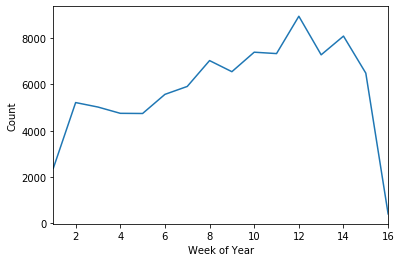

In [16]:
tdf_week = tdf['count'].groupby(by=tdf['time'].dt.week).sum()
tdf_week.plot(y='count')
plt.xlabel('Week of Year')
plt.ylabel('Count')
plt.show()

Except for the first and last week (for which our data is not complete), we can see the trend increasing with time, through the year

### <div class="alert alert-success"> Hourly Trend </div>

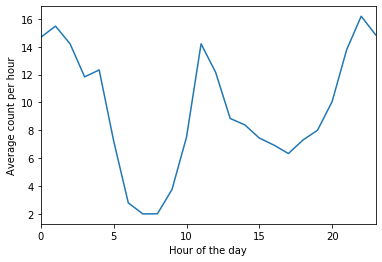

In [21]:
tdf_hourly = tdf['count'].groupby(by=tdf['time'].dt.hour).mean()
tdf_hourly.plot(y='count')
plt.xlabel('Hour of the day')
plt.ylabel('Average count per hour')
plt.show()

And it appears that the number of logins relatively increase by nighttime and during lunch hours